In [1]:
import pandas as pd
f1 = pd.read_csv("Espn_and_teamrankings_stats_2022.csv")
f2 = pd.read_csv("BPi_2022.csv")
f4 = pd.read_csv("Kenpom_2022.csv")
f1= f1.iloc[:,0:28]
f2= f2.iloc[:346,0:10]
f2['SEED'] = pd.to_numeric(f2['SEED'],errors='coerce')
f2 = f2.dropna()
f3 = f2.merge(f1, left_on='TEAM', right_on='TEAM')
f3 = f3.merge(f4, left_on='TEAM', right_on='Team')
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 5)
f3= f3.iloc[:,0:54]
f3.to_excel("new_2022.xlsx")






In [2]:
f5 = pd.read_csv("Last_bit_2022.csv")
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 48)
f5= f5.iloc[:,0:8]
f10 = f3.merge(f5, left_on='TEAM', right_on='Team')
f10['TSA'] = f10['FGA'] + .44*f10['FTA']
f10['TS_p'] = f10['PTS']/(2*f10['TSA'])
f10['efgM'] = f10['FGM'] + .5*f10['3PM']
f10['efg_p'] = f10['efgM']/f10['FGA']
f10['Percent_attempts3'] = f10['3PA']/f10['FGA']
print(f10)

              TEAM  SOR RK  ...     efg_p Percent_attempts3
0          Gonzaga     7.0  ...  0.594551          0.354167
1          Houston    14.0  ...  0.535000          0.391667
2          Arizona     2.0  ...  0.558632          0.356678
3         Kentucky     5.0  ...  0.533439          0.280255
4        Tennessee     3.0  ...  0.503322          0.405316
..             ...     ...  ...       ...               ...
63    Wright State   194.0  ...  0.518613          0.324873
64          Bryant   125.0  ...  0.504792          0.434505
65   CSU Fullerton   149.0  ...  0.497292          0.301444
66  Texas Southern   181.0  ...  0.487931          0.313793
67    Texas A&M-CC   207.0  ...  0.497529          0.313015

[68 rows x 67 columns]


In [3]:
massey_2022 = pd.read_csv("massey_2022.csv")
massey_2022 = massey_2022.iloc[0:68,0:2]
master_2022 = f10
master_2022 = master_2022.merge(massey_2022, left_on='TEAM', right_on='Team')
master_2022.to_excel("master_2022.xlsx")


In [4]:
historic = pd.read_csv("NCAA Mens March Madness Historical Results.csv")

In [5]:
historic['Year'] = historic['Date'].str[-2:]
historic['Year'] = historic['Year'].astype('int')
historic = historic[historic['Year'] <= 17]
historic = historic[historic['Year'] >= 8]

In [6]:
historic.to_excel("historic.xlsx")
games_stats = checker.merge(new_master,left_on=['Winner','Year'], right_on = ['Team','Year'])
games_stats = games_stats.merge(new_master,left_on=['Loser','Year'], right_on = ['Team','Year'])

NameError: name 'checker' is not defined

In [7]:
checker = pd.read_csv("historic_2.csv")
new_master = pd.read_csv("intermediate.csv")
import numpy as np
checker['Higher_Seed'] = np.where(checker['Winning Score'] % 2 == 0, checker['Winner'], checker['Loser'])
checker['Lower_Seed'] = np.where(checker['Winning Score'] % 2 != 0, checker['Winner'], checker['Loser'])

checker['Higher_Score'] = np.where(checker['Winning Score'] % 2 == 0, checker['Winning Score'], checker['Losing Score'])
checker['Lower_Score'] = np.where(checker['Winning Score'] % 2 != 0, checker['Winning Score'], checker['Losing Score'])
games_stats = checker.merge(new_master,left_on=['Higher_Seed','Year'], right_on = ['Team','Year'])
games_stats = games_stats.merge(new_master,left_on=['Lower_Seed','Year'], right_on = ['Team','Year'])
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 142)
games_stats['Y'] = games_stats['Higher_Score'] - games_stats['Lower_Score']
games_stats


,Unnamed: 0,Date,Round,Region,Winning Seed,Winner,Winning Score,Losing Seed,Loser,Losing Score,Overtime,Year,Higher_Seed,Lower_Seed,Higher_Score,Lower_Score,Team_x,Seed_x,Win_Percent_x,PPG_x,OPP_PPG_x,SCR_MAR_x,FGM_x,FGA_x,FG_percent_x,OPP_FG_x,OPP_FGA_x,OPP_FG_percent_x,3PG_x,3FG_percent_x,3FGA_x,percent_of3FGA_x,FTA_x,FT_percent_x,RPG_x,OPP_RPG_x,REB_MAR_x,APG_x,BKPG_x,STPG_x,TOPG_x,PFPG_x,Massy_Rankings_x,Kenpom_Rating_x,AdjO_x,AdjO_Rank_x,AdjD_x,AdjD_Rank_x,Adj_Tempo_x,Adj_Tempo_Rank_x,Luck_x,SOS_AdjEM_x,SOS_AdjEM_Rank_x,OppO_x,OppO_Rank_x,OppD_x,OppD_Rank_x,NCSOS_AdjEM_x,NCSOS+Rank_x,Depth_x,eFGM_x,eFG_percent_x,TSA_x,TS_percent_x,Rebounding_percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,...,NON_CONF_SOS_RK_x,BPI_Rank_x,BPI_OFF_x,BPI_DEF_x,BPI_x,Team_y,Seed_y,Win_Percent_y,PPG_y,OPP_PPG_y,SCR_MAR_y,FGM_y,FGA_y,FG_percent_y,OPP_FG_y,OPP_FGA_y,OPP_FG_percent_y,3PG_y,3FG_percent_y,3FGA_y,percent_of3FGA_y,FTA_y,FT_percent_y,RPG_y,OPP_RPG_y,REB_MAR_y,APG_y,BKPG_y,STPG_y,TOPG_y,PFPG_y,Massy_Rankings_y,Kenpom_Rating_y,AdjO_y,AdjO_Rank_y,AdjD_y,AdjD_Rank_y,Adj_Tempo_y,Adj_Tempo_Rank_y,Luck_y,SOS_AdjEM_y,SOS_AdjEM_Rank_y,OppO_y,OppO_Rank_y,OppD_y,OppD_Rank_y,NCSOS_AdjEM_y,NCSOS+Rank_y,Depth_y,eFGM_y,eFG_percent_y,TSA_y,TS_percent_y,Rebounding_percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponen_Effective_Possession_Ratio_y,SOR_RK_y,BPI_Projected_SEED_y,SOR_S_CURVE_y,SOS_RK_y,NON_CONF_SOS_RK_y,BPI_Rank_y,BPI_OFF_y,BPI_DEF_y,BPI_y,Y
0,1764.0,3/18/12,Round of 32,South,10.0,Xavier,70.0,15.0,Lehigh,58.0,NaN,12.0,Xavier,Lehigh,70.0,58.0,Xavier,10,63.9,70.6,67.3,3.4,899,1985,45.3,828,2063,40.1,4.9,35.1,501,0.25,819,69.5,36.2,34.1,2.1,13.1,3.8,6.0,12.6,18.5,38,12.59,108.7,74,96.1,49,66.4,104,0.031,7.24,31,107.4,20,100.1,48,4.56,47,3,986.9255,0.50,2394.5,0.53,0.52,0.30,0.18,0.18,0.28,0.1,0.952,...,16,49,5.2,2.8,8.0,Lehigh,15,77.1,75.7,65.4,10.3,902,2030,44.4,808,1952,41.4,7.3,35.0,726,0.36,768,76.8,35.9,34.3,1.5,13.0,3.0,7.7,11.2,18.0,58,9.29,108.6,76,99.3,96,67.6,56,-0.026,-5.57,300,100.3,293,105.8,295,-5.17,299,2,1029.050,0.51,2414.0,0.55,0.51,0.29,0.16,0.21,0.27,3.5,0.966,0.916,72,14,55,239,192,79,6.1,-0.1,6.0,12.0
1,1746.0,3/16/12,Round of 64,South,15.0,Lehigh,75.0,2.0,Duke,70.0,NaN,12.0,Duke,Lehigh,70.0,75.0,Duke,2,79.4,77.3,68.6,8.6,874,1915,45.6,864,1996,43.3,8.1,37.1,739,0.39,864,70.1,36.7,34.1,2.6,12.4,4.0,6.2,12.2,18.4,17,19.70,117.7,8,98.0,79,66.4,108,0.057,8.18,22,107.3,25,99.1,23,7.68,17,1,1011.0845,0.53,2347.0,0.56,0.52,0.33,0.17,0.18,0.30,0.6,0.979,...,7,11,12.2,2.6,14.8,Lehigh,15,77.1,75.7,65.4,10.3,902,2030,44.4,808,1952,41.4,7.3,35.0,726,0.36,768,76.8,35.9,34.3,1.5,13.0,3.0,7.7,11.2,18.0,58,9.29,108.6,76,99.3,96,67.6,56,-0.026,-5.57,300,100.3,293,105.8,295,-5.17,299,2,1029.050,0.51,2414.0,0.55,0.51,0.29,0.16,0.21,0.27,3.5,0.966,0.916,72,14,55,239,192,79,6.1,-0.1,6.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,1705.0,3/25/11,Sweet Sixteen,East,4.0,Kentucky,62.0,1.0,Ohio State,60.0,NaN,11.0,Kentucky,Ohio State,62.0,60.0,Kentucky,4,76.3,74.9,63.5,11.4,1002,2183,45.9,863,2188,39.4,7.4,39.7,707,0.32,789,71.0,37.4,33.8,3.6,12.7,6.3,5.6,10.7,15.8,6,25.82,117.8,8,92.0,16,65.0,184,-0.044,9.81,18,108.4,

In [8]:

games_stats = games_stats.drop(['Date','Round','Region','Winning Seed','Winner','Losing Seed','Loser','Losing Score','Overtime','Year','Higher_Seed','Lower_Seed','Higher_Score','Lower_Score','Team_x','Team_y'], axis=1)

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
games_stats= games_stats.drop(['Winning Score'], axis=1)

In [10]:
vars2 = ['Y']
y = games_stats.loc[:, vars2].values
games_stats = games_stats.drop(['Y'],axis=1)
games_stats = games_stats.iloc[:,1:]


In [706]:
west_2022 = west_2022.drop(['FG_percent_x','OPP_FG_percent_x','3FGA_x','APG_x','AdjO_Rank_x','AdjO_Rank_x','Adj_Tempo_Rank_x','Luck_x','SOS_AdjEM_Rank_x','OppO_Rank_x','OppD_Rank_x','NCSOS+Rank_x','SOR_RK_x','BPI_Projected_SEED_x','SOS_RK_x','NON_CONF_SOS_RK_x','BPI_Rank_x','Win_Percent_y','PPG_y','OPP_PPG_y','FG_percent_y','OPP_FG_percent_y','3FGA_y','APG_y','AdjO_Rank_y','AdjD_Rank_y','Adj_Tempo_Rank_y','Luck_y','SOS_AdjEM_Rank_y','OppO_Rank_y','OppD_Rank_y','NCSOS+Rank_y','SOR_RK_y','BPI_Projected_SEED_y','SOS_RK_y','NON_CONF_SOS_RK_y','BPI_Rank_y'],axis=1)

In [13]:

x = attempt.values
from sklearn import preprocessing
pd.set_option('display.max_columns', 104)
pd.set_option('display.max_rows', 1)
print((attempt.columns))

Index(['Seed_x', 'Win_Percent_x', 'PPG_x', 'OPP_PPG_x', 'FG_percent_x',
       'OPP_FG_percent_x', '3FG_percent_x', 'percent_of3FGA_x', 'FT_percent_x',
       'REB_MAR_x', 'APG_x', 'Massy_Rankings_x', 'Kenpom_Rating_x', 'AdjO_x',
       'AdjO_Rank_x', 'AdjD_x', 'AdjD_Rank_x', 'Adj_Tempo_x',
       'Adj_Tempo_Rank_x', 'Luck_x', 'SOS_AdjEM_x', 'SOS_AdjEM_Rank_x',
       'OppO_x', 'OppO_Rank_x', 'OppD_x', 'OppD_Rank_x', 'NCSOS_AdjEM_x',
       'NCSOS+Rank_x', 'eFG_percent_x', 'TS_percent_x', 'Rebounding_percent_x',
       'Offensive Rebounding_percent_x', 'Turnovers_Per_Possession_x',
       'Opponent_Turnovers_Per_Possession_x',
       'Opponent_Fouls_Per_Possession_x', 'Extra_Scoring_Chances_Per_Game_x',
       'Effective_Possession_Ratio_x', 'Opponen_Effective_Possession_Ratio_x',
       'SOR_RK_x', 'BPI_Projected_SEED_x', 'SOR_S_CURVE_x', 'SOS_RK_x',
       'NON_CONF_SOS_RK_x', 'BPI_Rank_x', 'BPI_OFF_x', 'BPI_DEF_x', 'BPI_x',
       'Seed_y', 'Win_Percent_y', 'PPG_y', 'OPP_PPG_y', 'FG

/Users/ethangoldberg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7131782945736435
0.7246376811594203
108.19412634622854
[-0.  0.  0. ... -0. -0. -0.] 0.0
-0.4564755838641189
0.0004230145360067876 206
3.360337625500182e-05 262
0.0004219325006328845 277
-0.0008501040549794913 1076
-0.0007676234751988434 1128
-0.00033603987267331366 1242
0.0010261939642958644 1284
5.889934895181371e-05 1287
0.00018960746914949947 1294
0.0002265196630045585 1296
0.00010742808146637816 1314
4.83369668293751e-06 1315
-0.0001348181566801897 1324
6.080347409289634e-05 1348
-7.475153924535836e-05 1380
0.00014078094446590852 1479
8.261497705946494e-05 1486
6.421081081699743e-05 1506
-7.793989069810426e-05 1524
-0.0001671635886359811 1537
-3.901758690496927e-05 1634
-0.00010915706256917894 1639
8.556645139262845e-05 1641
-0.00011030579948976875 1643
-1.6646137909420313e-05 1659
0.0005553409623388411 1674
-0.00019189358268912183 1686
-8.419154621837991e-05 1688
-1.167629028039973e-05 1690
-3.662020772770418e-05 1859
0.00048542480345725226 2042
6.657907145116817e-05 2046
7.652

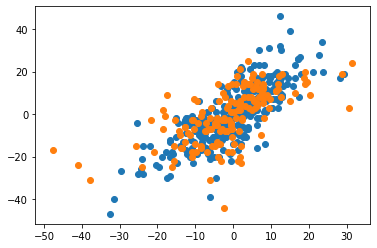

In [16]:
regressor = LassoCV(alphas=[1000], cv = 5,fit_intercept=False, normalize= True,max_iter=5000)
regressor.fit(p2_train, y_train)
preds = regressor.predict(p2_test)
preds_train = regressor.predict(p2_train)
pd.set_option('display.max_columns', 100)
count = 0
count1 = 0
for x in range(len(preds_train)):
    if preds_train[x]> -5 and preds_train[x]< 5:
        if(preds_train[x]>0 and y_train[x]>0):
         count+=1
        if(preds_train[x]<0 and y_train[x]<0):
         count+=1
        count1 +=1
print(count/count1)
count = 0
count1 = 0
for x in range(len(preds)):
    if preds[x]> -5 and preds[x]< 5:
        if(preds[x]>0 and y_test[x]>0):
         count+=1
        if(preds[x]<0 and y_test[x]<0):
         count+=1
        count1 +=1
print(count/count1)
print(mean_squared_error(preds,y_test))
print(regressor.coef_,regressor.intercept_)
print(np.average(y))
for x in range(len(regressor.coef_)):
    if regressor.coef_[x] != 0:
        print(regressor.coef_[x],x)
plt.scatter(preds_train,y_train)
plt.scatter(preds,y_test)

In [14]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=1)

# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(310, 94) (310, 1)
(161, 94) (161, 1)


NameError: name 'preds' is not defined

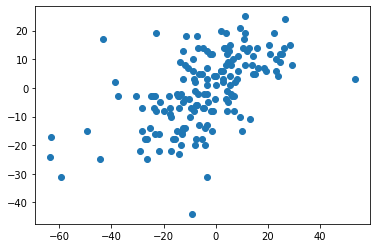

In [15]:
# try both linear and polynomial of different degrees
linear_model = LinearRegression(normalize=True,fit_intercept=False)
p2_model = LinearRegression(normalize=True)
p3_model = LinearRegression(normalize=True)


p2_features = PolynomialFeatures(degree=2)
p2_train = p2_features.fit_transform(x_train)
p2_test = p2_features.fit_transform(x_test)
#x_west_p2 = p2_features.fit_transform(x_west)

p3_features = PolynomialFeatures(degree=3)
p3_train = p3_features.fit_transform(x_train)
p3_test = p3_features.fit_transform(x_test)

# now do estimation of models
lin_1 = linear_model.fit(x_train, y_train)
p2_1= p2_model.fit(p2_train, y_train)
p3_1 = p3_model.fit(p3_train, y_train)
preds_p2 = p2_1.predict(p2_test)
preds_p3 = p3_1.predict(p3_test)
plt.scatter(preds_p3,y_test)
print(preds)

9.547334070261169

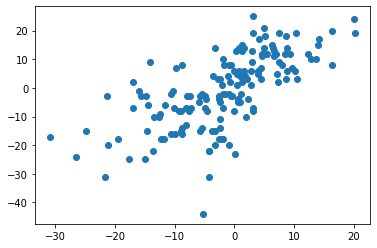

In [906]:
preds_p2 = regressor.predict(p2_test)
plt.scatter(preds_p2,y_test)
mean_squared_error(preds_p2,y_test) ** .5


In [466]:
print ("linear train / test rmse: ", mean_squared_error(y_train, lin_1.predict(x_train))**(.5), " / ", mean_squared_error(y_test, lin_1.predict)**(.5))
print ("poly degree 2 train / test rmse: ", mean_squared_error(y_train, p2_1.predict(p2_train))**(.5), " / ", mean_squared_error(y_test, p2_predict)**(.5))
#
# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, lin_1.predict(x_train)), " / ", r2_score(y_test, lin1_predict))
print ("poly degree 2 train / test r^2: ", r2_score(y_train, p2_1.predict(p2_train)), " / ", r2_score(y_test, p2_predict))

TypeError: Expected sequence or array-like, got <class 'method'>

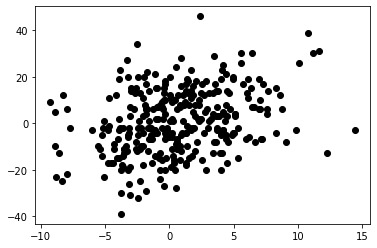

In [548]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(preds_train, y_train, 'o', color='black');

In [547]:
pca1 = PCA(n_components=2)

# create 2 dimensional representation
latent_vars = pca1.fit_transform(x_train)
print ("Variance explained by each latent variable in PCA: ", pca1.explained_variance_ratio_)

#print latent variables, which can be used downstream in models instead of x
#print(latent_vars)

# check components to see if they make sense
print (vars)
print (pca1.components_)

# create new dataframe with the latent variables from pca1


# scan a few rows of new dataset
print ()
#print (df3.iloc[:10])

print ("Variance explained by each latent variable in PCA: ", pca1.explained_variance_ratio_)
print ("\n")


Variance explained by each latent variable in PCA:  [0.36154134 0.29342051]
<built-in function vars>
[[-2.83380842e-02  1.03867800e-01  1.20347203e-03  2.03206669e-04
   2.11412421e-02 -2.72588797e-02  7.04824962e-01 -1.69968847e-01
  -6.00809233e-02  1.09835208e-01  1.40297695e-02 -8.97393598e-02
  -2.01552413e-02  6.96109878e-02  6.45352807e-03  6.56160204e-06
  -8.52870792e-05 -3.24025471e-04  1.72199747e-04  3.17088499e-05
  -3.06820770e-05 -2.17612626e-02 -8.42025340e-05  2.32884176e-04
   4.93269152e-01 -5.86171584e-02 -5.25308541e-02 -1.11124727e-01
  -5.28974294e-02  1.30910834e-02  9.97940439e-05  1.82901955e-02
   1.13743904e-02 -3.10668194e-01  8.65552846e-02  7.12049458e-02
  -1.53567167e-02  3.62728678e-03  4.84817172e-02  4.90424337e-02
   6.05142955e-04 -5.49464779e-03  1.65814104e-04  2.13469954e-04
   1.50844456e-04 -2.30891929e-05 -3.65466885e-05  9.53447145e-05
   4.59432195e-04  3.44720785e-04  3.28274937e-04 -2.19832708e-01
   2.24808981e-02  2.98093795e-02  5.2284

In [480]:
attempt["percent_of3FGA_x * Massy_Rankings_x"] = attempt["percent_of3FGA_x"] * attempt['Massy_Rankings_x']

In [11]:
attempt = games_stats.drop(['SCR_MAR_x','FGM_x','FGA_x','OPP_FG_x','OPP_FGA_x','3PG_x','FTA_x','RPG_x','OPP_RPG_x','BKPG_x','STPG_x','TOPG_x','PFPG_x','eFGM_x','Depth_x','TSA_x','SCR_MAR_y','FGM_y','FGA_y','OPP_FG_y','OPP_FGA_y','3PG_y','FTA_y','RPG_y','OPP_RPG_y','BKPG_y','STPG_y','TOPG_y','PFPG_y','eFGM_y','Depth_y','TSA_y'], axis=1)
attempt = games_stats.drop(['SCR_MAR_x','FGM_x','FGA_x','OPP_FG_x','OPP_FGA_x','3PG_x','FTA_x','RPG_x','OPP_RPG_x','BKPG_x','STPG_x','TOPG_x','PFPG_x','eFGM_x','Depth_x','TSA_x','SCR_MAR_y','FGM_y','FGA_y','OPP_FG_y','OPP_FGA_y','3PG_y','FTA_y','RPG_y','OPP_RPG_y','BKPG_y','STPG_y','TOPG_y','PFPG_y','eFGM_y','Depth_y','TSA_y'], axis=1)

In [481]:
attempt["Massy_Rankings_x * Adj_Tempo_Rank_x"] = attempt["Massy_Rankings_x"] * attempt['Adj_Tempo_Rank_x']
attempt["Kenpom_Rating_x FT_percent_y"] = attempt["Kenpom_Rating_x"] * attempt['FT_percent_y']
attempt["SOR_RK_x BPI_Rank_x"] = attempt["SOR_RK_x"] * attempt['BPI_Rank_x']
attempt["AdjO_Rank_x BPI_Rank_x"] = attempt["AdjO_Rank_x"] * attempt['BPI_Rank_x']
attempt["SOS_AdjEM_x BPI_OFF_y"] = attempt["SOS_AdjEM_x"] * attempt['BPI_OFF_y']



In [327]:
print(checker['Winner'],checker['Loser'])

print(x_train)

0         Xavier
1       Syracuse
          ...   
1146         NaN
1147         NaN
Name: Winner, Length: 1148, dtype: object 0       Lehigh
1         MTSU
         ...  
1146       NaN
1147       NaN
Name: Loser, Length: 1148, dtype: object
[[0.29560464 0.00157446 0.01330418 ... 0.21491362 0.50697573 0.0138328 ]
 [0.30755943 0.00169092 0.01610131 ... 0.13734022 0.54128205 0.00482927]
 [0.20203309 0.00128016 0.00684306 ... 0.16409369 0.10823201 0.00314687]
 ...
 [0.55661689 0.00121333 0.02275001 ... 0.03003001 0.08675337 0.03959958]
 [0.12449754 0.00092966 0.00501244 ... 0.8470791  0.49504623 0.00196694]
 [0.5435816  0.00165524 0.02873501 ... 0.05793348 0.40553439 0.02562481]]


In [255]:
regressor1 = LassoCV(alphas=[.1], cv = 5, normalize = True)
regressor1.fit(p2_train, y_train)
preds1 = regressor1.predict(p2_test)
pd.set_option('display.max_columns', 100)
count = 0
count1 = 0
for x in range(len(preds1)):
    if(preds1[x]>0 and y_test[x]>0):
     count+=1
    if(preds1[x]<0 and y_test[x]<0):
     count+=1
    count1 +=1
print(count/count1)
for x in range(len(regressor1.coef_)):
    if (regressor1.coef_[x]!=0):
        print(regressor1.coef_[x])
        print(x)
        
print(regressor1.intercept_)

/Users/ethangoldberg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X and y have inconsistent dimensions (315 != 353)

In [856]:
west_2022 = pd.read_csv("Games_test_2022_west.csv")
west_2022= west_2022.iloc[0:13,0:97]
print(west_2022)


    Unnamed: 0  Seed_x  Win_Percent_x  PPG_x  OPP_PPG_x  FG_percent_x  \
0          0.0    16.0            0.6   70.6       67.2          40.3   
..         ...     ...            ...    ...        ...           ...   

    OPP_FG_percent_x  3FG_percent_x  3FGA_x  percent_of3FGA_x  FT_percent_x  \
0               0.43           32.9    23.4              0.38          71.7   
..               ...            ...     ...               ...           ...   

    REB_MAR_x  APG_x  Massy_Rankings_x  Kenpom_Rating_x  AdjO_x  AdjO_Rank_x  \
0         0.9   13.5             158.0             1.84   101.5        201.0   
..        ...    ...               ...              ...     ...          ...   

    AdjD_x  AdjD_Rank_x  Adj_Tempo_x  Adj_Tempo_Rank_x  Luck_x  SOS_AdjEM_x  \
0     99.7        114.0         67.1             174.0    0.06        -1.29   
..     ...          ...          ...               ...     ...          ...   

    SOS_AdjEM_Rank_x  OppO_x  OppO_Rank_x  OppD_x  OppD_Rank_x 

In [ ]:
west_2022["percent_of3FGA_x * Massy_Rankings_x"] = west_2022["percent_of3FGA_x"] * west_2022['Massy_Rankings_x']
west_2022["Massy_Rankings_x * Adj_Tempo_Rank_x"] = west_2022["Massy_Rankings_x"] * west_2022['Adj_Tempo_Rank_x']
west_2022["Kenpom_Rating_x FT_percent_y"] = west_2022["Kenpom_Rating_x"] * west_2022['FT_percent_y']
west_2022["SOR_RK_x BPI_Rank_x"] = west_2022["SOR_RK_x"] * west_2022['BPI_Rank_x']
west_2022["AdjO_Rank_x BPI_Rank_x"] = west_2022["AdjO_Rank_x"] * west_2022['BPI_Rank_x']
west_2022["SOS_AdjEM_x BPI_OFF_y"] = west_2022["SOS_AdjEM_x"] * west_2022['BPI_OFF_y']

In [728]:
x_west = west_2022.values
from sklearn import preprocessing
x_west = preprocessing.normalize(x_west)

In [730]:
preds = regressor.predict(x_west)
print(preds)

[-22.53053406  -2.50379548 -12.91760231 -13.33031793  -7.17545683
  -5.28392094 -20.89176837  -6.52871939 -22.51621967   3.92659627
  -1.51460302 -25.269251   -31.41083988]


In [695]:
west_2022 = west_2022.drop(['Win_Percent_x','PPG_x',  'OPP_PPG_x',  'SCR_MAR_x', 'FGM_x', 'FGA_x', 'FG_percent_x',  'OPP_FG_x',  'OPP_FGA_x',  'OPP_FG_percent_x',  '3PG_x', '3FGA_x','FTA_x','RPG_x','OPP_RPG_x','APG_x','BKPG_x','STPG_x','TOPG_x','PFPG_x','AdjO_Rank_x','AdjD_Rank_x','Adj_Tempo_Rank_x','Luck_x','SOS_AdjEM_Rank_x','OppO_Rank_x','OppD_Rank_x','NCSOS+Rank_x','Depth_x','eFGM_x','TSA_x','TS_percent_x','SOR_RK_x','BPI_Projected_SEED_x','SOS_RK_x','BPI_Rank_x','NON_CONF_SOS_RK_x','Win_Percent_y','PPG_y',  'OPP_PPG_y',  'SCR_MAR_y', 'FGM_y', 'FGA_y', 'FG_percent_y',  'OPP_FG_y',  'OPP_FGA_y',  'OPP_FG_percent_y',  '3PG_y', '3FGA_y','FTA_y','RPG_y','OPP_RPG_y','APG_y','BKPG_y','STPG_y','TOPG_y','PFPG_y','AdjO_Rank_y','AdjD_Rank_y','Adj_Tempo_Rank_y','Luck_y','SOS_AdjEM_Rank_y','OppO_Rank_y','OppD_Rank_y','NCSOS+Rank_y','Depth_y','eFGM_y','TSA_y','TS_percent_y','SOR_RK_y','BPI_Projected_SEED_y','SOS_RK_y','BPI_Rank_y','NON_CONF_SOS_RK_y'],axis=1)

KeyError: "['SCR_MAR_x' 'FGM_x' 'FGA_x' 'OPP_FG_x' 'OPP_FGA_x' '3PG_x' 'FTA_x'\n 'RPG_x' 'OPP_RPG_x' 'BKPG_x' 'STPG_x' 'TOPG_x' 'PFPG_x' 'Depth_x'\n 'eFGM_x' 'TSA_x' 'SCR_MAR_y' 'FGM_y' 'FGA_y' 'OPP_FG_y' 'OPP_FGA_y'\n '3PG_y' 'FTA_y' 'RPG_y' 'OPP_RPG_y' 'BKPG_y' 'STPG_y' 'TOPG_y' 'PFPG_y'\n 'Depth_y' 'eFGM_y' 'TSA_y'] not found in axis"

In [12]:
attempt = attempt.drop(['3FGA_x','3FGA_y'],axis=1)

In [659]:
games_stats=games_stats.drop(['Y'],axis=1)

In [718]:
west_2022 = west_2022.drop(['AdjD_Rank_x','TS_percent_x','TS_percent_y'],axis=1)

In [719]:
west_2022

,Unnamed: 0,Seed_x,3FG_percent_x,percent_of3FGA_x,FT_percent_x,REB_MAR_x,Massy_Rankings_x,Kenpom_Rating_x,AdjO_x,AdjD_x,Adj_Tempo_x,SOS_AdjEM_x,OppO_x,OppD_x,NCSOS_AdjEM_x,eFG_percent_x,Rebounding_percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,Opponen_Effective_Possession_Ratio_x,SOR_S_CURVE_x,BPI_OFF_x,BPI_DEF_x,BPI_x,Seed_y,3FG_percent_y,percent_of3FGA_y,FT_percent_y,REB_MAR_y,Massy_Rankings_y,Kenpom_Rating_y,AdjO_y,AdjD_y,Adj_Tempo_y,SOS_AdjEM_y,OppO_y,OppD_y,NCSOS_AdjEM_y,eFG_percent_y,Rebounding_percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponen_Effective_Possession_Ratio_y,SOR_S_CURVE_y,BPI_OFF_y,BPI_DEF_y,BPI_y
0,0.0,16.0,32.9,0.38,71.7,0.9,158.0,1.84,101.5,99.7,67.1,-1.29,101.1,102.4,2.05,0.47,0.5,0.31,0.17,0.22,0.24,6.5,0.99,0.9,63.0,-1.1,2.6,1.5,1.0,37.9,0.35,73.0,8.9,1.0,32.97,121.8,88.8,72.5,3.78,104.5,100.8,-2.56,0.59,0.56,0.28,0.16,0.17,0.24,1.2,0.96,0.94,7.0,12.7,8.1,20.8


In [503]:
for i in range(0,len(regressor.coef_)):
    if regressor.coef_[i] !=0:
        print(regressor.coef_[i],i)

3.4152924802156425e-05 0
-9.653681898776965 9
-9.322787918670434 19
-10.219336413385662 21
1.2177367608536342 30
28.10014495129347 45
4.44971753090182 57
-10.46989778191246 69
-30.574719983541225 72
-4.967273177805728 78
1.956401582875505 93
5.157899116548569 98
0.031483448705183555 154


In [511]:
print(attempt)

    Unnamed: 0  Seed_x  Win_Percent_x  PPG_x  OPP_PPG_x  FG_percent_x  \
0       1764.0      10           63.9   70.6       67.3          45.3   
..         ...     ...            ...    ...        ...           ...   

    OPP_FG_percent_x  3FG_percent_x  3FGA_x  percent_of3FGA_x  FT_percent_x  \
0               40.1           35.1     501              0.25          69.5   
..               ...            ...     ...               ...           ...   

    REB_MAR_x  APG_x  Massy_Rankings_x  Kenpom_Rating_x  AdjO_x  AdjO_Rank_x  \
0         2.1   13.1                38            12.59   108.7           74   
..        ...    ...               ...              ...     ...          ...   

    AdjD_x  AdjD_Rank_x  Adj_Tempo_x  Adj_Tempo_Rank_x  Luck_x  SOS_AdjEM_x  \
0     96.1           49         66.4               104   0.031         7.24   
..     ...          ...          ...               ...     ...          ...   

    SOS_AdjEM_Rank_x  OppO_x  OppO_Rank_x  OppD_x  OppD_Rank_x 

    Unnamed: 0     Date        Round Region  Winning Seed  Winner  \
0       1764.0  3/18/12  Round of 32  South          10.0  Xavier   
..         ...      ...          ...    ...           ...     ...   

    Winning Score  Losing Seed   Loser  Losing Score Overtime  Year  \
0            70.0         15.0  Lehigh          58.0      NaN  12.0   
..            ...          ...     ...           ...      ...   ...   

   Higher_Seed Lower_Seed  Higher_Score  Lower_Score  
0       Xavier     Lehigh          70.0         58.0  
..         ...        ...           ...          ...  

[1148 rows x 16 columns]


In [644]:
new_master = pd.read_csv("intermediate.csv")
attempt_2 = new_master.drop(['Win_Percent','PPG',  'OPP_PPG',  'SCR_MAR', 'FGM', 'FGA', 'FG_percent',  'OPP_FG',  'OPP_FGA',  'OPP_FG_percent',  '3PG', '3FGA','FTA','RPG','OPP_RPG','APG','BKPG','STPG','TOPG','PFPG','AdjO_Rank','AdjD_Rank','Adj_Tempo_Rank','Luck','SOS_AdjEM_Rank','OppO_Rank','OppD_Rank','NCSOS+Rank','Depth','eFGM','TSA','TS_percent','SOR_RK','BPI_Projected_SEED','SOS_RK','BPI_Rank','NON_CONF_SOS_RK'],axis=1)
checker = pd.read_csv("historic_2.csv")
print(attempt_2)

    Team  Year  Seed  3FG_percent  percent_of3FGA  FT_percent  REB_MAR  \
0   UCLA     8     1         35.0            0.28        73.2      8.2   
..   ...   ...   ...          ...             ...         ...      ...   

    Massy_Rankings  Kenpom_Rating   AdjO  AdjD  Adj_Tempo  SOS_AdjEM   OppO  \
0                4          29.94  118.0  88.1       64.1      10.03  109.3   
..             ...            ...    ...   ...        ...        ...    ...   

    OppD  NCSOS_AdjEM  eFG_percent  Rebounding_percent  \
0   99.3        -1.63         0.53                0.56   
..   ...          ...          ...                 ...   

    Offensive Rebounding_percent  Turnovers_Per_Possession  \
0                           0.39                      0.18   
..                           ...                       ...   

    Opponent_Turnovers_Per_Possession  Opponent_Fouls_Per_Possession  \
0                                0.21                           0.27   
..                               

In [775]:
import numpy as np
checker = pd.read_csv("historic_2.csv")
checker['Higher_Seed'] = np.where(checker['Winning Score'] % 2 == 0, checker['Winner'], checker['Loser'])
checker['Lower_Seed'] = np.where(checker['Winning Score'] % 2 != 0, checker['Winner'], checker['Loser'])

checker['Higher_Score'] = np.where(checker['Winning Score'] % 2 == 0, checker['Winning Score'], checker['Losing Score'])
checker['Lower_Score'] = np.where(checker['Winning Score'] % 2 != 0, checker['Winning Score'], checker['Losing Score'])
games_stats = checker.merge(attempt_2,left_on=['Higher_Seed','Year'], right_on = ['Team','Year'])
games_stats = games_stats.merge(attempt_2,left_on=['Lower_Seed','Year'], right_on = ['Team','Year'])
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 142)
games_stats['Y'] = checker['Higher_Score'] - checker['Lower_Score']
y=games_stats['Y'].values

In [774]:
games_stats

,Unnamed: 0,Date,Round,Region,Winning Seed,Winner,Winning Score,Losing Seed,Loser,Losing Score,Overtime,Year,Higher_Seed,Lower_Seed,Higher_Score,Lower_Score,Team_x,Seed_x,3FG_percent_x,percent_of3FGA_x,FT_percent_x,REB_MAR_x,Massy_Rankings_x,Kenpom_Rating_x,AdjO_x,AdjD_x,Adj_Tempo_x,SOS_AdjEM_x,OppO_x,OppD_x,NCSOS_AdjEM_x,eFG_percent_x,Rebounding_percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,Opponen_Effective_Possession_Ratio_x,SOR_S_CURVE_x,BPI_OFF_x,BPI_DEF_x,BPI_x,Team_y,Seed_y,3FG_percent_y,percent_of3FGA_y,FT_percent_y,REB_MAR_y,Massy_Rankings_y,Kenpom_Rating_y,AdjO_y,AdjD_y,Adj_Tempo_y,SOS_AdjEM_y,OppO_y,OppD_y,NCSOS_AdjEM_y,eFG_percent_y,Rebounding_percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponen_Effective_Possession_Ratio_y,SOR_S_CURVE_y,BPI_OFF_y,BPI_DEF_y,BPI_y,Y
0,1764.0,3/18/12,Round of 32,South,10.0,Xavier,70.0,15.0,Lehigh,58.0,NaN,12.0,Xavier,Lehigh,70.0,58.0,Xavier,10,35.1,0.25,69.5,2.1,38,12.59,108.7,96.1,66.4,7.24,107.4,100.1,4.56,0.50,0.52,0.30,0.18,0.18,0.28,0.1,0.952,0.951,46,5.2,2.8,8.0,Lehigh,15,35.0,0.36,76.8,1.5,58,9.29,108.6,99.3,67.6,-5.57,100.3,105.8,-5.17,0.51,0.51,0.29,0.16,0.21,0.27,3.5,0.966,0.916,55,6.1,-0.1,6.0,12.0
1,1746.0,3/16/12,Round of 64,South,15.0,Lehigh,75.0,2.0,Duke,70.0,NaN,12.0,Duke,Lehigh,70.0,75.0,Duke,2,37.1,0.39,70.1,2.6,17,19.70,117.7,98.0,66.4,8.18,107.3,99.1,7.68,0.53,0.52,0.33,0.17,0.18,0.30,0.6,0.979,0.970,10,12.2,2.6,14.8,Lehigh,15,35.0,0.36,76.8,1.5,58,9.29,108.6,99.3,67.6,-5.57,100.3,105.8,-5.17,0.51,0.51,0.29,0.16,0.21,0.27,3.5,0.966,0.916,55,6.1,-0.1,6.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,1705.0,3/25/11,Sweet Sixteen,East,4.0,Kentucky,62.0,1.0,Ohio State,60.0,NaN,11.0,Kentucky,Ohio State,62.0,60.0,Kentucky,4,39.7,0.32,71.0,3.6,6,25.82,117.8,92.0,65.0,9.81,108.4,98.5,4.46,0.52,0.53,0.33,0.16,0.18,0.27,2.7,0.997,0.958,7,9.1,8.0,17.1,Ohio State,1,42.3,0.33,70.1,4.9,1,33.47,125.0,91.5,63.8,8.82,108.9,100.0,-4.08,0.56,0.54,0.34,0.15,0.22,0.29,7.0,0.998,0.892,1,3.7,6.7,10.4,23.0
470,1910.0,3/29/14,Elite Eight,West,2.0,Wisconsin,64.0,1.0,Arizona,63.0,1 OT,14.0,Wisconsin,Arizona,64.0,63.0,Wisconsin,2,37.6,0.39,74.6,1.4,8,25.89,122.0,96.1,62.4,11.44,110.2,98.8,3.33,0.53,0.51,0.26,0.13,0.15,0.31,1.4,0.994,0.972,3,7.8,8.0,15.8,Arizona,1,36.4,0.26,65.9,7.1,4,30.11,116.5,86.4,62.8,9.30,109.9,100.6,1.62,0.52,0.55,0.34,0.15,0.19,0.27,4.8,1.002,0.929,2,5.9,11.8,17.7,-14.0


In [731]:
games_stats["Kenpom_Rating_x FT_percent_y"] = attempt["Kenpom_Rating_x"] * attempt['FT_percent_y']
games_stats["SOS_AdjEM_x BPI_OFF_y"] = attempt["SOS_AdjEM_x"] * attempt['BPI_OFF_y']



In [733]:
x = games_stats.values
from sklearn import preprocessing
x = preprocessing.normalize(x)

[ 0.46085768  0.14852595 -0.21706105 -0.5021803   0.49842803  1.4135723
 -0.3501441   0.16955924]
0.0
Index(['3FG_percent_x', 'Massy_Rankings_x', 'Kenpom_Rating_x', '3FG_percent_y',
       'Massy_Rankings_y', 'Kenpom_Rating_y', 'Seed_x', 'Seed_y'],
      dtype='object')
[1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.

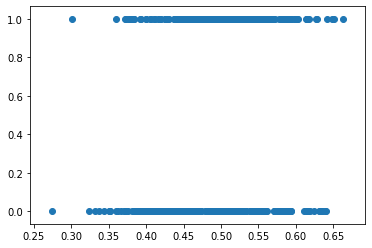

In [796]:
x = mod_last_resort.values
from sklearn import preprocessing
x = preprocessing.normalize(x)
lin_1 = linear_model.fit(x, y)
predssss9 = lin_1.predict(x)
plt.scatter(predssss9,y)
print(lin_1.coef_)
print(lin_1.intercept_)
print(mod_last_resort.columns)
print(y)

In [787]:
predssss9 = lin_1.predict(x)
plt.scatter(predssss9,y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 55 is different from 8)

In [739]:
west_2022["Kenpom_Rating_x FT_percent_y"] = west_2022["Kenpom_Rating_x"] * west_2022['FT_percent_y']
west_2022["SOS_AdjEM_x BPI_OFF_y"] = west_2022["SOS_AdjEM_x"] * west_2022['BPI_OFF_y']

In [798]:
x_west = west_last_resort.values
from sklearn import preprocessing
x_west = preprocessing.normalize(x_west)
p = lin_1.predict(x_west)
print(p)

[0.3584765  0.53922441 0.38253518 0.42415236 0.44726376 0.48026484
 0.4009051  0.40313723 0.3331127  0.49956464 0.54534443 0.43249828
 0.41237583]


In [765]:
print(west_2022.columns)
print(games_stats.columns)

Index(['Unnamed: 0', 'Seed_x', '3FG_percent_x', 'percent_of3FGA_x',
       'FT_percent_x', 'REB_MAR_x', 'Massy_Rankings_x', 'Kenpom_Rating_x',
       'AdjO_x', 'AdjD_x', 'Adj_Tempo_x', 'SOS_AdjEM_x', 'OppO_x', 'OppD_x',
       'NCSOS_AdjEM_x', 'eFG_percent_x', 'Rebounding_percent_x',
       'Offensive Rebounding_percent_x', 'Turnovers_Per_Possession_x',
       'Opponent_Turnovers_Per_Possession_x',
       'Opponent_Fouls_Per_Possession_x', 'Extra_Scoring_Chances_Per_Game_x',
       'Effective_Possession_Ratio_x', 'Opponen_Effective_Possession_Ratio_x',
       'SOR_S_CURVE_x', 'BPI_OFF_x', 'BPI_DEF_x', 'BPI_x', 'Seed_y',
       '3FG_percent_y', 'percent_of3FGA_y', 'FT_percent_y', 'REB_MAR_y',
       'Massy_Rankings_y', 'Kenpom_Rating_y', 'AdjO_y', 'AdjD_y',
       'Adj_Tempo_y', 'SOS_AdjEM_y', 'OppO_y', 'OppD_y', 'NCSOS_AdjEM_y',
       'eFG_percent_y', 'Rebounding_percent_y',
       'Offensive Rebounding_percent_y', 'Turnovers_Per_Possession_y',
       'Opponent_Turnovers_Per_Possessio

In [776]:
west_last_resort = west_2022[["3FG_percent_x", "Massy_Rankings_x",'Kenpom_Rating_x','3FG_percent_y','Massy_Rankings_y','Kenpom_Rating_y','Seed_x','Seed_y']]
mod_last_resort = games_stats[["3FG_percent_x", "Massy_Rankings_x",'Kenpom_Rating_x','3FG_percent_y','Massy_Rankings_y','Kenpom_Rating_y','Seed_x','Seed_y']]

In [771]:
regressor1 = RidgeCV(alphas=[0,.00001,.0001,.001,.01,.005], cv = 5, normalize = True)
regressor1.fit(p2_train, y_train)
preds1 = regressor1.predict(p2_test)
pd.set_option('display.max_columns', 100)
count = 0
count1 = 0
for x in range(len(preds1)):
    if(preds1[x]>0 and y_test[x]>0):
     count+=1
    if(preds1[x]<0 and y_test[x]<0):
     count+=1
    count1 +=1
print(count/count1)
for x in range(len(regressor1.coef_)):
    if (regressor1.coef_[x]!=0):
        print(regressor1.coef_[x])
        print(x)
        
print(regressor1.intercept_)

    3FG_percent_x  Massy_Rankings_x  Kenpom_Rating_x  3FG_percent_y  \
0            32.9             158.0             1.84           37.9   
1            35.9              38.0            16.22           34.8   
..            ...               ...              ...            ...   
11           31.7             204.0            -1.33           33.5   
12           33.5             251.0            -6.31           31.7   

    Massy_Rankings_y  Kenpom_Rating_y  Seed_x  Seed_y  
0                1.0            32.97    16.0     1.0  
1               40.0            16.41     9.0     8.0  
..               ...              ...     ...     ...  
11             251.0            -6.31    16.0    16.0  
12             204.0            -1.33    16.0    16.0  

[13 rows x 8 columns]
     3FG_percent_x  Massy_Rankings_x  Kenpom_Rating_x  3FG_percent_y  \
0             35.1                38            12.59           35.0   
1             37.1                17            19.70           35.0  

In [794]:
for x in range(len(y)):
    if y[x]>0:
        y[x]=1
    else:
        y[x]=0

In [800]:
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 40)
count = 0
count1 = 0
for x in range(len(predssss9)):
    if(predssss9[x]>.5 and y[x]>.5):
     count+=1
    if(predssss9[x]<=.5 and y[x]<=.5):
     count+=1
    count1 +=1
print(count/count1)

0.524416135881104


In [829]:
from sklearn.linear_model import LogisticRegression
poly = PolynomialFeatures(degree = 1, interaction_only=False, include_bias=False)
x_p = poly.fit_transform(mod_last_resort)
w_p = poly.fit_transform(west_last_resort)
lr = LogisticRegression()
lr.fit(x_p,y)
pr = lr.predict(x_p)
for x in range(len(pr)):
    if(pr[x]>.5 and y[x]>.5):
     count+=1
    if(pr[x]<=.5 and y[x]<=.5):
     count+=1
    count1 +=1
print(count/count1)
wr = lr.predict(w_p)
print(wr)

0.5621331335081804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


/Users/ethangoldberg/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [828]:
print(lr.coef_)
print(west_last_resort)

[[-0.00145808 -0.00674326 -0.02068731 -0.04898231  0.01019694  0.05818975
  -0.0020367   0.01206525]]
    3FG_percent_x  Massy_Rankings_x  Kenpom_Rating_x  3FG_percent_y  \
0            32.9             158.0             1.84           37.9   
1            35.9              38.0            16.22           34.8   
2            32.6              91.0            10.10           35.3   
3            36.4              83.0            13.07           30.7   
4            34.3              60.0            13.10           33.9   
5            38.0              51.0            13.63           33.6   
6            36.9             126.0             3.81           31.4   
7            38.6              52.0            14.80           37.8   
8            33.0             153.0             2.10           36.8   
9            34.1              10.0            26.50           35.4   
10           39.3              34.0            17.86           32.3   
11           31.7             204.0           

In [982]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
west_2022 = west_2022.drop(['3FGA_x','3FGA_y'],axis=1)
west_2022['Win_Percent_x'] = west_2022['Win_Percent_x']*100
west_2022['Win_Percent_y'] = west_2022['Win_Percent_y']*100
west_2022['OPP_FG_percent_x'] = west_2022['OPP_FG_percent_x']*100
west_2022['OPP_FG_percent_y'] = west_2022['OPP_FG_percent_y']*100
west_2022.describe(include='all')


,Seed_x,Win_Percent_x,PPG_x,OPP_PPG_x,FG_percent_x,OPP_FG_percent_x,3FG_percent_x,percent_of3FGA_x,FT_percent_x,REB_MAR_x,APG_x,Massy_Rankings_x,Kenpom_Rating_x,AdjO_x,AdjO_Rank_x,AdjD_x,AdjD_Rank_x,Adj_Tempo_x,Adj_Tempo_Rank_x,Luck_x,SOS_AdjEM_x,SOS_AdjEM_Rank_x,OppO_x,OppO_Rank_x,OppD_x,OppD_Rank_x,NCSOS_AdjEM_x,NCSOS+Rank_x,eFG_percent_x,TS_percent_x,Rebounding_percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,Opponen_Effective_Possession_Ratio_x,SOR_RK_x,BPI_Projected_SEED_x,SOR_S_CURVE_x,SOS_RK_x,NON_CONF_SOS_RK_x,BPI_Rank_x,BPI_OFF_x,BPI_DEF_x,BPI_x,Seed_y,Win_Percent_y,PPG_y,OPP_PPG_y,FG_percent_y,OPP_FG_percent_y,3FG_percent_y,percent_of3FGA_y,FT_percent_y,REB_MAR_y,APG_y,Massy_Rankings_y,Kenpom_Rating_y,AdjO_y,AdjO_Rank_y,AdjD_y,AdjD_Rank_y,Adj_Tempo_y,Adj_Tempo_Rank_y,Luck_y,SOS_AdjEM_y,SOS_AdjEM_Rank_y,OppO_y,OppO_Rank_y,OppD_y,OppD_Rank_y,NCSOS_AdjEM_y,NCSOS+Rank_y,eFG_percent_y,TS_percent_y,Rebounding_percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponen_Effective_Possession_Ratio_y,SOR_RK_y,BPI_Projected_SEED_y,SOR_S_CURVE_y,SOS_RK_y,NON_CONF_SOS_RK_y,BPI_Rank_y,BPI_OFF_y,BPI_DEF_y,BPI_y
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,12.307692,71.769231,73.476923,65.584615,45.915385,41.461538,35.169231,0.376923,72.607692,3.961538,13.869231,100.846154,9.645385,108.107692,104.000000,98.461538,95.461538,66.269231,214.230769,0.020769,-0.387692,180.076923,102.669231,189.307692,103.053846,167.000000,0.913077,149.846154,0.526923,0.563077,0.527692,0.283077,0.177692,0.186154,0.261538,1.638462,0.950000,0.926154,88.153846,12.307692,50.692308,196.846154,169.461538,99.307692,3.461538,2.461538,5.923077,7.076923,72.076923,74.692308,65.469231,46.069231,40.461538,34.238462,0.340769,71.992308,4.846154,14.815385,52.307692,16.671538,110.476923,80.000000,93.80000,42.923077,67.523077,165.769231,0.003077,5.135385,93.769231,105.707692,95.307692,100.569231,91.307692,-2.945385,241.461538,0.520000,0.557692,0.533846,0.305385,0.179231,0.186923,0.254615,2.015385,0.957692,0.930769,49.538462,7.076923,33.153846,84.230769,98.307692,53.538462,5.200000,5.838462,11.030769
std,3.224506,8.945705,2.666819,3.325118,2.283581,2.066212,2.501128,0.051702,3.345759,2.357449,1.835931,72.704707,9.073963,6.597659,97.345604,3.463509,51.399766,2.026649,96.497110,0.041726,6.039026,112.696836,3.051880,109.077484,3.329568,111.224248,4.555443,94.184965,0.028978,0.029264,0.019215,0.060192,0.023507,0.023643,0.021926,2.936704,0.024495,0.022560,62.536451,3.224506,16.779872,117.688746,126.850710,75.048190,4.285545,3.012070,6.590290,5.251373,11.109017,6.385199,3.399849,2.771397,1.613246,2.368030,0.024987,3.332282,2.324011,2.526145,79.504072,10.834308,7.471184,94.155899,4.57475,49.735067,2.904638,117.201503,0.035913,6.534559,111.442178,3.415519,111.966055,3.417208,102.933137,5.777953,115.036672,

In [1019]:
x_west = west_2022.values
x_west_p2 = p2_features.fit_transform(x_west)
print(regressor.predict(x_west_p2))

[-23.99346041   0.8865841  -31.06019808 -11.57473342 -11.63889581
  -2.75296061 -37.74632496  -7.74042562 -34.47481659  -3.74013757
  -8.11040912]


In [1015]:
west_2022=west_2022.iloc[:-2,:]
x_west = west_2022.values
x_west_p2 = p2_features.fit_transform(x_west)
print(regressor.predict(x_west_p2))

[-24.01913041   0.91827246 -31.05302607 -11.57673673 -11.6410209
  -2.7472059  -37.74271198  -7.74399747 -34.46928946  -3.73785822
  -8.10169548]


In [18]:
gggg = pd.read_excel("Games_Test_Finals.xlsx")

In [20]:
gggg = gggg.drop(['3FGA_x','3FGA_y'],axis=1)
gggg['Win_Percent_x'] = gggg['Win_Percent_x']*100
gggg['Win_Percent_y'] = gggg['Win_Percent_y']*100
gggg['OPP_FG_percent_x'] = gggg['OPP_FG_percent_x']*100
gggg['OPP_FG_percent_y'] = gggg['OPP_FG_percent_y']*100
gggg.describe(include='all')

,Seed_x,Win_Percent_x,PPG_x,OPP_PPG_x,FG_percent_x,OPP_FG_percent_x,3FG_percent_x,percent_of3FGA_x,FT_percent_x,REB_MAR_x,APG_x,Massy_Rankings_x,Kenpom_Rating_x,AdjO_x,AdjO_Rank_x,AdjD_x,AdjD_Rank_x,Adj_Tempo_x,Adj_Tempo_Rank_x,Luck_x,SOS_AdjEM_x,SOS_AdjEM_Rank_x,OppO_x,OppO_Rank_x,OppD_x,OppD_Rank_x,NCSOS_AdjEM_x,NCSOS+Rank_x,eFG_percent_x,TS_percent_x,Rebounding_percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,Opponen_Effective_Possession_Ratio_x,SOR_RK_x,BPI_Projected_SEED_x,SOR_S_CURVE_x,SOS_RK_x,NON_CONF_SOS_RK_x,BPI_Rank_x,BPI_OFF_x,BPI_DEF_x,BPI_x,Seed_y,Win_Percent_y,PPG_y,OPP_PPG_y,FG_percent_y,OPP_FG_percent_y,3FG_percent_y,percent_of3FGA_y,FT_percent_y,REB_MAR_y,APG_y,Massy_Rankings_y,Kenpom_Rating_y,AdjO_y,AdjO_Rank_y,AdjD_y,AdjD_Rank_y,Adj_Tempo_y,Adj_Tempo_Rank_y,Luck_y,SOS_AdjEM_y,SOS_AdjEM_Rank_y,OppO_y,OppO_Rank_y,OppD_y,OppD_Rank_y,NCSOS_AdjEM_y,NCSOS+Rank_y,eFG_percent_y,TS_percent_y,Rebounding_percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponen_Effective_Possession_Ratio_y,SOR_RK_y,BPI_Projected_SEED_y,SOR_S_CURVE_y,SOS_RK_y,NON_CONF_SOS_RK_y,BPI_Rank_y,BPI_OFF_y,BPI_DEF_y,BPI_y
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [119]:
tot = gggg.values
tot_p2 = p2_features.fit_transform(tot)
tourney_preds = regressor.predict(tot_p2)
np.std(tourney_preds)
np.average(tourney_preds)

-1.7313915490545997

In [83]:
seeds = pd.read_excel("seeds_2022-2.xlsx")
master = pd.read_excel("master_2022.xlsx")
seeds

,school_id,seed,region
0,akron,13,east


In [79]:
bracket_builder = pd.DataFrame()
bracket_builder['Team_1'] = ""
bracket_builder['Team_2'] = ""

In [ ]:
attempt.to_csv("attempppp")

In [59]:
import itertools
from itertools import permutations
 
# initialize lists
list_1 = seeds['school_id']
list_2 = seeds['school_id']
 
# create empty list to store the
# combinations
unique_combinations = []
 
# Getting all permutations of list_1
# with length of list_2
permut = itertools.permutations(list_1, 2)

In [60]:
 
# zip() is called to pair each permutation
# and shorter list element into combination
for comb in permut:
    unique_combinations.append(comb)
 
# printing unique_combination list

In [74]:
team_1 = []
team_2 = []
for j in range(len(unique_combinations)):
    team_1.append(unique_combinations[j][0])
    team_2.append(unique_combinations[j][1])


In [80]:
bracket_builder['Team_1'] = team_1
bracket_builder['Team_2'] = team_2

In [91]:
bracket_builder_key = bracket_builder.iloc[:,0:2]
bracket_builder_key

,Team_1,Team_2
0,akron,alabama


In [85]:
bracket_builder = bracket_builder.merge(master, left_on='Team_1', right_on='Team')
bracket_builder = bracket_builder.merge(master, left_on='Team_2', right_on='Team')

In [102]:
bracket_builder_ = bracket_builder.iloc[:,4:]
bracket_builder_ = bracket_builder_.drop(['Team_y','Unnamed: 0_y'],axis=1)

In [115]:
gggg= bracket_builder_
gggg = gggg.drop(['3PA_x','3PA_y'],axis=1)
gggg['Opponent Fg%_x'] = gggg['Opponent Fg%_x']*100
gggg['Opponent Fg%_y'] = gggg['Opponent Fg%_y']*100
gggg.describe(include='all')

,SEED_x,Win_Percent_x,PTS_x,Opponent PPG_x,FG%_x,Opponent Fg%_x,3P%_x,Percent_attempts3_x,FT%_x,Reb_mar_x,AST_x,Massy Rank_x,Kenpom_Rating_x,AdjO_x,AdjO_Rank_x,AdjD_x,AdjD_Rank_x,Adj_Tempo_x,Adj_Tempo_Rank_x,Luck_x,SOS_AdjEM_x,SOS_AdjEM_Rank_x,OppO_x,OppO_Rank_x,OppD_x,OppD_Rank_x,NCSOS_AdjEM_x,NCSOS+Rank_x,efg_p_x,TS_p_x,Rebounding_Percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,Opponent_Effective_Possession_Ratio_x,SOR RK_x,SEED.1_x,SOR S-CURVE_x,SOS RK_x,NON-CONF SOS RK_x,BPI RK_x,BPI OFF_x,BPI DEF_x,BPI_x,SEED_y,Win_Percent_y,PTS_y,Opponent PPG_y,FG%_y,Opponent Fg%_y,3P%_y,Percent_attempts3_y,FT%_y,Reb_mar_y,AST_y,Massy Rank_y,Kenpom_Rating_y,AdjO_y,AdjO_Rank_y,AdjD_y,AdjD_Rank_y,Adj_Tempo_y,Adj_Tempo_Rank_y,Luck_y,SOS_AdjEM_y,SOS_AdjEM_Rank_y,OppO_y,OppO_Rank_y,OppD_y,OppD_Rank_y,NCSOS_AdjEM_y,NCSOS+Rank_y,efg_p_y,TS_p_y,Rebounding_Percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponent_Effective_Possession_Ratio_y,SOR RK_y,SEED.1_y,SOR S-CURVE_y,SOS RK_y,NON-CONF SOS RK_y,BPI RK_y,BPI OFF_y,BPI DEF_y,BPI_y
count,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0,4032.0


In [114]:
bracket_builder_

,SEED_x,Win_Percent_x,PTS_x,Opponent PPG_x,FG%_x,Opponent Fg%_x,3P%_x,3PA_x,Percent_attempts3_x,FT%_x,Reb_mar_x,AST_x,Massy Rank_x,Kenpom_Rating_x,AdjO_x,AdjO_Rank_x,AdjD_x,AdjD_Rank_x,Adj_Tempo_x,Adj_Tempo_Rank_x,Luck_x,SOS_AdjEM_x,SOS_AdjEM_Rank_x,OppO_x,OppO_Rank_x,OppD_x,OppD_Rank_x,NCSOS_AdjEM_x,NCSOS+Rank_x,efg_p_x,TS_p_x,Rebounding_Percent_x,Offensive Rebounding_percent_x,Turnovers_Per_Possession_x,Opponent_Turnovers_Per_Possession_x,Opponent_Fouls_Per_Possession_x,Extra_Scoring_Chances_Per_Game_x,Effective_Possession_Ratio_x,Opponent_Effective_Possession_Ratio_x,SOR RK_x,SEED.1_x,SOR S-CURVE_x,SOS RK_x,NON-CONF SOS RK_x,BPI RK_x,BPI OFF_x,BPI DEF_x,BPI_x,SEED_y,Win_Percent_y,PTS_y,Opponent PPG_y,FG%_y,Opponent Fg%_y,3P%_y,3PA_y,Percent_attempts3_y,FT%_y,Reb_mar_y,AST_y,Massy Rank_y,Kenpom_Rating_y,AdjO_y,AdjO_Rank_y,AdjD_y,AdjD_Rank_y,Adj_Tempo_y,Adj_Tempo_Rank_y,Luck_y,SOS_AdjEM_y,SOS_AdjEM_Rank_y,OppO_y,OppO_Rank_y,OppD_y,OppD_Rank_y,NCSOS_AdjEM_y,NCSOS+Rank_y,efg_p_y,TS_p_y,Rebounding_Percent_y,Offensive Rebounding_percent_y,Turnovers_Per_Possession_y,Opponent_Turnovers_Per_Possession_y,Opponent_Fouls_Per_Possession_y,Extra_Scoring_Chances_Per_Game_y,Effective_Possession_Ratio_y,Opponent_Effective_Possession_Ratio_y,SOR RK_y,SEED.1_y,SOR S-CURVE_y,SOS RK_y,NON-CONF SOS RK_y,BPI RK_y,BPI OFF_y,BPI DEF_y,BPI_y
0,13,71.0,71.2,64.2,46.2,0.432,35.7,22.2,0.41966,68.7,3.5,11.9,116,3.49,106.2,113,102.7,166,62.1,351,0.026,-5.24,280,100.8,264,106.0,288,-4.18,286,0.535917,0.5729,0.519,0.276,0.174,0.172,0.291,0.3,0.946,0.942,113,13,56,275,251,102,3.1,1.0,4.1,6,59.4,80.0,76.4,44.1,0.435,30.8,30.1,0.479299,73.0,3.8,14.6,23,17.36,116.1,14,98.7,94,71.7,12,-0.022,12.79,1,109.7,3,96.9,7,10.22,11,0.515127,0.554908,0.525,0.338,0.194,0.173,0.245,-0.2,0.961,0.964,27,6,27,1,5,21,8.6,3.4,12.1


In [121]:
gggg['tourney_preds'] = tourney_preds
bracket_builder_key['tourney_preds'] = tourney_preds

In [163]:
bracket_builder_wwp = pd.read_excel("bracket_builder_with_winp.xlsx")

In [165]:
dictionary = {}
for q in range(len(bracket_builder_wwp['Team_1'])):
    key = bracket_builder_wwp['Team_1'][q]+' v '+ bracket_builder_wwp['Team_2'][q]
    key_check = bracket_builder_wwp['Team_2'][q]+' v '+ bracket_builder_wwp['Team_1'][q]
    if key_check in dictionary:
        dictionary[key_check] = (dictionary[key_check]+ (1-bracket_builder_wwp['Win_Percentage'][q]))/2
    else:
        dictionary[key] = bracket_builder_wwp['Win_Percentage'][q]


In [166]:
Game = list(dictionary.keys())
Winp = list(dictionary.values())
bracket_builder_av = pd.DataFrame()
bracket_builder_av['Game'] = Game
bracket_builder_av['Win Percentage of Asterisk Team'] = Winp

In [169]:
bracket_builder_av.to_csv("bracket_builder_av.csv")

In [170]:
bracket_builder_av.to_excel("bracket_makin_time.xlsx")